# Chapter 8: Demo Oversampling

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('points_o.csv', index_col=0)

In [6]:
data.head()


,0,1,target
0,0.153184,-1.013156,1
1,0.876102,0.980291,1
2,0.677376,0.060854,1
3,0.697991,2.207370,1
4,1.306738,2.383626,1


In [7]:
from collections import Counter

In [8]:
print(Counter(data['target']).items())

dict_items([(1, 897), (0, 103)])


##### Visualize data 1

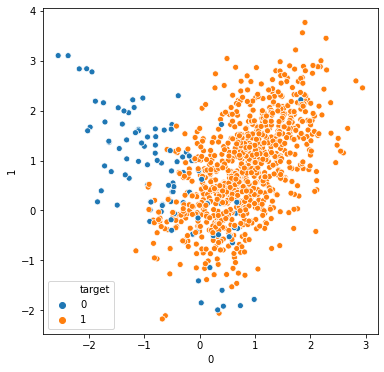

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='0', y='1', hue='target')
plt.show()

##### Visualize data 2

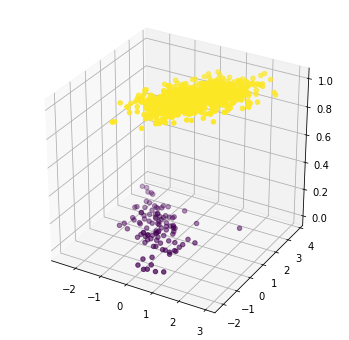

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['0'], data['1'], data['target'], 
           c=data['target'])
plt.show()

### SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
X_S, y_S = SMOTE().fit_resample(data[['0','1']], data['target'])
print(sorted(Counter(y_S).items()))

[(0, 897), (1, 897)]


In [14]:
data_S= pd.DataFrame(X_S)
data_S['target'] = y_S
data_S.head()

,0,1,target
0,0.153184,-1.013156,1
1,0.876102,0.980291,1
2,0.677376,0.060854,1
3,0.697991,2.207370,1
4,1.306738,2.383626,1


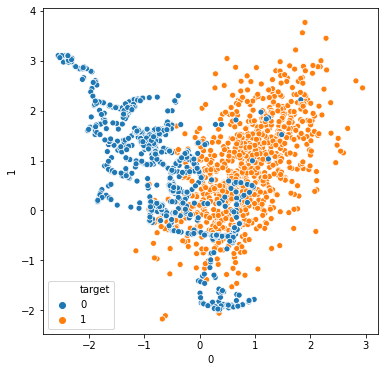

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_S, x='0', y='1', hue='target')

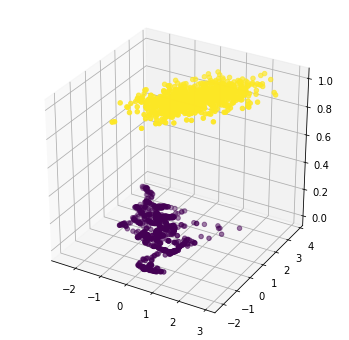

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_S['0'], data_S['1'], data_S['target'], 
           c=data_S['target'])
plt.show()

### Resample

In [21]:
data_0 = data[data.target==0]
data_1 = data[data.target==1]

In [22]:
data_0.shape

(103, 3)

In [23]:
data_1.shape

(897, 3)

In [24]:
from sklearn.utils import resample

In [25]:
data_0_resample = resample(data_0,
                          replace=True, # sample with replacement
                          n_samples=data_1.shape[0], # match number in majority class
                          random_state=27) # reproducible results

In [26]:
# replace=True: Implements resampling with replacement. If False, this will implement (sliced) random permutations.

In [27]:
data_0_resample.shape

(897, 3)

In [30]:
upsampled = pd.concat([data_0_resample, data_1], ignore_index=True)

In [32]:
upsampled.target.value_counts()

1    897
0    897
Name: target, dtype: int64

In [33]:
upsampled.head()

,0,1,target
0,-0.940349,0.510450,0
1,-1.320958,1.413146,0
2,0.427550,-1.919720,0
3,-0.057661,-0.430930,0
4,-1.320958,1.413146,0


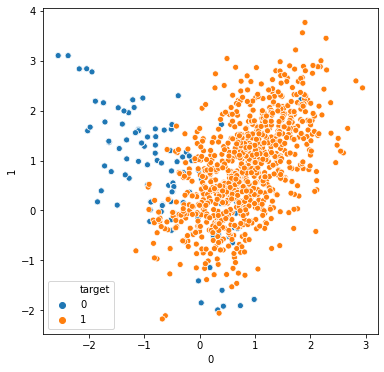

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=upsampled, x='0', y='1', hue='target')

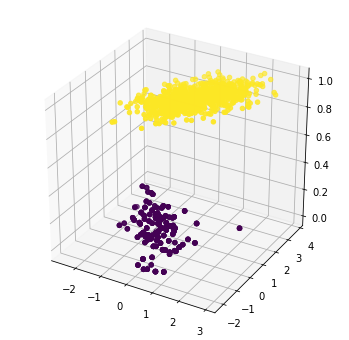

In [35]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(upsampled['0'], upsampled['1'], upsampled['target'], 
           c=upsampled['target'])
plt.show()